<a href="https://colab.research.google.com/github/pranjal2234/Weather-Forecasting/blob/main/Weather_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Task is to predict next day's maximum temperature
#Importing files
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
weather = pd.read_csv("/content/drive/MyDrive/Data/weather.csv", index_col="DATE")
weather.tail()

,STATION,NAME,ACMH,ACSH,DAPR,DASF,MDPR,MDSF,PGTM,PRCP,...,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
2022-07-30,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-31,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-02,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-03,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Checking the percentage of null values in the columns
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.841342
ACSH       0.841342
DAPR       0.999946
DASF       0.999946
MDPR       0.999946
MDSF       0.999946
PGTM       0.842482
PRCP       0.001520
PSUN       0.841342
SNOW       0.007113
SNWD       0.007276
TMAX       0.001086
TMIN       0.001303
TOBS       0.166097
TSUN       0.841451
WDFG       0.842482
WDFM       0.841342
WESD       0.980073
WSFG       0.842428
WSFM       0.841342
WT01       0.733073
WT02       0.996253
WT03       0.884129
WT04       0.989575
WT05       0.994896
WT06       0.984797
WT07       0.999946
WT08       0.921323
WT09       0.997068
WT11       0.989738
WT16       0.934354
WT18       0.969159
dtype: float64

In [ ]:
# Using the columns that having lesser missing values
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [ ]:
core_weather.columns = ["precipitation", "snow_fall", "snow_depth", "max_temp", "min_temp"]
core_weather

,precipitation,snow_fall,snow_depth,max_temp,min_temp
DATE,,,,,
1972-01-01,0.01,0.0,0.0,43.0,34.0
1972-01-02,0.00,0.0,0.0,36.0,28.0
1972-01-03,0.10,1.2,0.0,36.0,20.0
1972-01-04,0.13,1.9,1.0,20.0,7.0
1972-01-05,0.00,0.0,3.0,13.0,-1.0
...,...,...,...,...,...
2022-07-30,0.00,0.0,0.0,85.0,66.0
2022-07-31,0.00,0.0,0.0,86.0,68.0
2022-08-01,0.00,0.0,0.0,89.0,75.0


In [ ]:
#Checking the percentage of null values in the columns
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precipitation    0.001520
snow_fall        0.007113
snow_depth       0.007276
max_temp         0.001086
min_temp         0.001303
dtype: float64

In [ ]:
core_weather["precipitation"].value_counts()
# Most of the values in precipitation, snow_fall, snow_depth are zeroes. Fill nan values as "0"

0.00    11987
0.01      585
0.02      466
0.03      333
0.05      323
        ...  
3.90        1
2.72        1
1.91        1
3.18        1
2.69        1
Name: precipitation, Length: 264, dtype: int64

In [ ]:
core_weather[["precipitation", "snow_fall", "snow_depth"]] = core_weather[["precipitation", "snow_fall", "snow_depth"]].fillna(0)

In [ ]:
core_weather

,precipitation,snow_fall,snow_depth,max_temp,min_temp
DATE,,,,,
1972-01-01,0.01,0.0,0.0,43.0,34.0
1972-01-02,0.00,0.0,0.0,36.0,28.0
1972-01-03,0.10,1.2,0.0,36.0,20.0
1972-01-04,0.13,1.9,1.0,20.0,7.0
1972-01-05,0.00,0.0,3.0,13.0,-1.0
...,...,...,...,...,...
2022-07-30,0.00,0.0,0.0,85.0,66.0
2022-07-31,0.00,0.0,0.0,86.0,68.0
2022-08-01,0.00,0.0,0.0,89.0,75.0


In [ ]:
core_weather[["max_temp", "min_temp"]].isna().sum()
#There are 20 null values in the max_temp and 24 null values in the min_temp

max_temp    20
min_temp    24
dtype: int64

In [ ]:
core_weather = core_weather.fillna(method="ffill")
core_weather[["max_temp", "min_temp"]].isna().sum()
#There are no null values in these columns

max_temp    0
min_temp    0
dtype: int64

In [ ]:
core_weather
#Now our data is cleaned

,precipitation,snow_fall,snow_depth,max_temp,min_temp
DATE,,,,,
1972-01-01,0.01,0.0,0.0,43.0,34.0
1972-01-02,0.00,0.0,0.0,36.0,28.0
1972-01-03,0.10,1.2,0.0,36.0,20.0
1972-01-04,0.13,1.9,1.0,20.0,7.0
1972-01-05,0.00,0.0,3.0,13.0,-1.0
...,...,...,...,...,...
2022-07-30,0.00,0.0,0.0,85.0,66.0
2022-07-31,0.00,0.0,0.0,86.0,68.0
2022-08-01,0.00,0.0,0.0,89.0,75.0


In [ ]:
#Changing the datatype of index into datetime datatype
core_weather.index = pd.to_datetime(core_weather.index)

In [ ]:
core_weather.index

DatetimeIndex(['1972-01-01', '1972-01-02', '1972-01-03', '1972-01-04',
               '1972-01-05', '1972-01-06', '1972-01-07', '1972-01-08',
               '1972-01-09', '1972-01-10',
               ...
               '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28',
               '2022-07-29', '2022-07-30', '2022-07-31', '2022-08-01',
               '2022-08-02', '2022-08-03'],
              dtype='datetime64[ns]', name='DATE', length=18417, freq=None)

In [ ]:
core_weather.apply(lambda x:  (x==9999).sum())

precipitation    0
snow_fall        0
snow_depth       0
max_temp         0
min_temp         0
dtype: int64

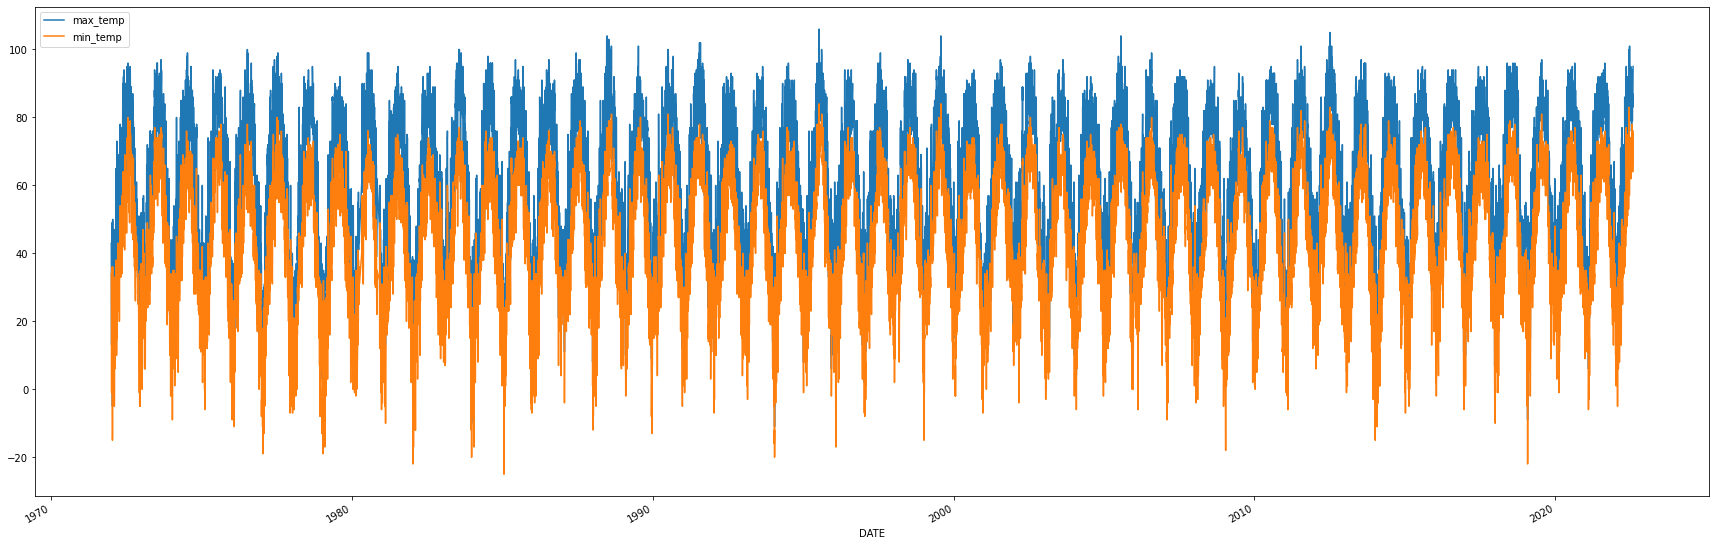

In [ ]:
core_weather[["max_temp", "min_temp"]].plot(figsize=(30,10))

In [ ]:
# Creating our target
core_weather["target"] = core_weather.shift(-1)["max_temp"]

In [ ]:
core_weather

,precipitation,snow_fall,snow_depth,max_temp,min_temp,target
DATE,,,,,,
1972-01-01,0.01,0.0,0.0,43.0,34.0,36.0
1972-01-02,0.00,0.0,0.0,36.0,28.0,36.0
1972-01-03,0.10,1.2,0.0,36.0,20.0,20.0
1972-01-04,0.13,1.9,1.0,20.0,7.0,13.0
1972-01-05,0.00,0.0,3.0,13.0,-1.0,32.0
...,...,...,...,...,...,...
2022-07-30,0.00,0.0,0.0,85.0,66.0,86.0
2022-07-31,0.00,0.0,0.0,86.0,68.0,89.0
2022-08-01,0.00,0.0,0.0,89.0,75.0,91.0


In [ ]:
#Deleting the last row as it has NaN value
core_weather = core_weather.iloc[:-1,:].copy()

In [ ]:
core_weather

,precipitation,snow_fall,snow_depth,max_temp,min_temp,target
DATE,,,,,,
1972-01-01,0.01,0.0,0.0,43.0,34.0,36.0
1972-01-02,0.00,0.0,0.0,36.0,28.0,36.0
1972-01-03,0.10,1.2,0.0,36.0,20.0,20.0
1972-01-04,0.13,1.9,1.0,20.0,7.0,13.0
1972-01-05,0.00,0.0,3.0,13.0,-1.0,32.0
...,...,...,...,...,...,...
2022-07-29,0.00,0.0,0.0,83.0,64.0,85.0
2022-07-30,0.00,0.0,0.0,85.0,66.0,86.0
2022-07-31,0.00,0.0,0.0,86.0,68.0,89.0


In [ ]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [ ]:
predictors = ["precipitation", "snow_fall", "snow_depth", "max_temp", "min_temp"]
train_data = core_weather.iloc[:17500]
test_data = core_weather.iloc[17501:]

In [ ]:
test_data

,precipitation,snow_fall,snow_depth,max_temp,min_temp,target
DATE,,,,,,
2020-01-31,0.02,0.5,0.0,37.0,31.0,38.0
2020-02-01,0.04,0.4,0.0,38.0,33.0,54.0
2020-02-02,0.00,0.0,0.0,54.0,35.0,47.0
2020-02-03,0.00,0.0,0.0,47.0,30.0,38.0
2020-02-04,0.00,0.0,0.0,38.0,31.0,31.0
...,...,...,...,...,...,...
2022-07-29,0.00,0.0,0.0,83.0,64.0,85.0
2022-07-30,0.00,0.0,0.0,85.0,66.0,86.0
2022-07-31,0.00,0.0,0.0,86.0,68.0,89.0


In [ ]:
reg.fit(train_data[predictors],train_data["target"])

Ridge(alpha=0.1)

In [ ]:
predictions = reg.predict(test_data[predictors])

In [ ]:
predictions

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test_data["target"], predictions)

6.338184108651647

In [ ]:
combined = pd.concat([test_data["target"], pd.Series(predictions, index = test_data.index)], axis=1)

In [ ]:
combined.columns = ["actual_temp", "predict_temp"]
combined

,actual_temp,predict_temp
DATE,,
2020-01-31,38.0,41.236667
2020-02-01,54.0,42.573381
2020-02-02,47.0,53.983603
2020-02-03,38.0,47.888273
2020-02-04,31.0,42.523788
...,...,...
2022-07-29,85.0,81.993324
2022-07-30,86.0,83.925029
2022-07-31,89.0,85.223700


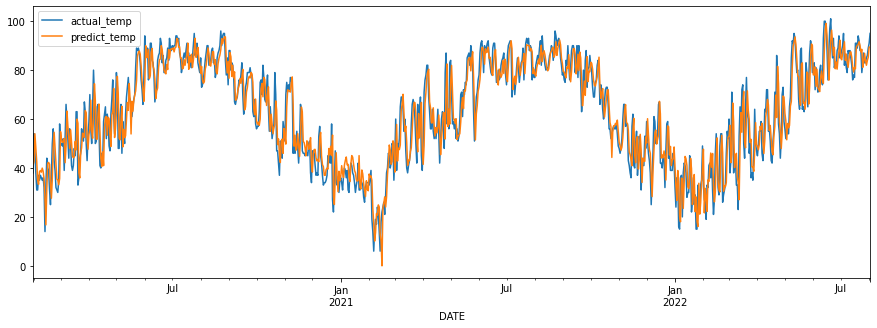

In [ ]:
combined.plot(figsize=(15,5))

In [ ]:
def weather_predict(predictors,core_weather,reg):
  train_data = core_weather.iloc[:17500]
  test_data = core_weather.iloc[17501:]
  reg.fit(train_data[predictors],train_data["target"])
  predictions = reg.predict(test_data[predictors])
  error = mean_absolute_error(test_data["target"], predictions)
  combined = pd.concat([test_data["target"], pd.Series(predictions, index = test_data.index)], axis=1)
  combined.columns = ["actual_temp", "predict_temp"]
  return error, combined

In [ ]:
core_weather["month_max"] = core_weather["max_temp"].rolling(30).mean()
core_weather["weekly_max"] = core_weather["max_temp"].rolling(7).mean()
core_weather["month_min"] = core_weather["min_temp"].rolling(30).mean()
core_weather["weekly_min"] = core_weather["min_temp"].rolling(7).mean()

In [ ]:
core_weather

,precipitation,snow_fall,snow_depth,max_temp,min_temp,target,month_max,weekly_max,month_min,weekly_min
DATE,,,,,,,,,,
1972-01-01,0.01,0.0,0.0,43.0,34.0,36.0,NaN,NaN,NaN,NaN
1972-01-02,0.00,0.0,0.0,36.0,28.0,36.0,NaN,NaN,NaN,NaN
1972-01-03,0.10,1.2,0.0,36.0,20.0,20.0,NaN,NaN,NaN,NaN
1972-01-04,0.13,1.9,1.0,20.0,7.0,13.0,NaN,NaN,NaN,NaN
1972-01-05,0.00,0.0,3.0,13.0,-1.0,32.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-07-29,0.00,0.0,0.0,83.0,64.0,85.0,85.833333,84.428571,70.200000,69.571429
2022-07-30,0.00,0.0,0.0,85.0,66.0,86.0,85.533333,84.000000,69.933333,68.857143
2022-07-31,0.00,0.0,0.0,86.0,68.0,89.0,85.566667,83.714286,69.900000,68.000000


In [ ]:
core_weather = core_weather.dropna()
core_weather.head(8)

,precipitation,snow_fall,snow_depth,max_temp,min_temp,target,month_max,weekly_max,month_min,weekly_min
DATE,,,,,,,,,,
1972-01-30,0.00,0.0,1.0,12.0,2.0,31.0,30.200000,19.000000,15.166667,3.714286
1972-01-31,0.00,0.0,1.0,31.0,2.0,33.0,29.800000,16.714286,14.100000,2.428571
1972-02-01,0.04,0.9,1.0,33.0,18.0,35.0,29.700000,19.571429,13.766667,4.428571
1972-02-02,0.12,2.3,2.0,35.0,30.0,33.0,29.666667,22.714286,14.100000,7.857143
1972-02-03,0.12,2.1,4.0,33.0,9.0,10.0,30.100000,24.857143,14.166667,8.285714
1972-02-04,0.00,0.0,5.0,10.0,-2.0,26.0,30.000000,24.285714,14.133333,8.142857
1972-02-05,0.00,0.0,4.0,26.0,-2.0,29.0,29.800000,25.714286,13.633333,8.142857
1972-02-06,0.04,0.6,3.0,29.0,1.0,8.0,29.466667,28.142857,12.800000,8.000000


In [ ]:
core_weather["month/max_temp"] = core_weather["month_max"]/core_weather["max_temp"]

In [ ]:
#Removing the infinte values obtained by dividing with 0
import numpy as np
core_weather["max/min"] = core_weather["max_temp"]/core_weather["min_temp"]
core_weather = core_weather.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [ ]:
predictors = ["precipitation", "snow_fall", "snow_depth", "max_temp", "min_temp","month_max","weekly_max","month_min","weekly_min","month/max_temp","max/min"]

In [ ]:
error, predictionas = weather_predict(predictors,core_weather,reg)

In [ ]:
error
# Previous error was 6.338184108651647

6.097369306235763